In [1]:
import pandas as pd
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import os as os
import pickle 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,log_loss

C:\Users\raghuram\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [2]:
df=pd.read_excel('total_collated.xlsx',usecols=[0,1], header=[0],encoding = "utf-8")

df=df.dropna()
df.reset_index(drop=True,inplace=True)
df


,product_intent,uri
0,bands,/wedding-rings/womens-wedding-rings
1,bands,/wedding-rings/mens-wedding-rings
2,bands,/wedding-rings/all-wedding-rings
3,bands,/wedding-rings
4,bands,/wedding-rings/womens-wedding-rings/diamond
...,...,...
1926,engagement,/petite-graduated-milgrain-engagement-ring_56233
1927,engagement,/build-your-own-ring/trio-micropave-engagement-ring-14k-white-gold_60444
1928,engagement,/build-your-own-ring/halo-diamond-engagement-ring-18k-white-gold_33363
1929,engagement,/build-your-own-ring/monique-lhuillier-halo-engagement-ring-platinum_35414


In [3]:
def preprocess_data(text):
    #text=str(text.encode("utf-8"))
    text=text.lower()
    text=text.replace("/"," ")
    text=re.sub("\d","",text)
    text=text.replace("-"," ") 
    text=text.replace("_"," ") 
    text=text.replace("|"," ") 
    text=text.replace("="," ") 
    text=text.replace("?","")
    return text
df['clean_uri']=df['uri'].apply(preprocess_data)
df


,product_intent,uri,clean_uri
0,bands,/wedding-rings/womens-wedding-rings,wedding rings womens wedding rings
1,bands,/wedding-rings/mens-wedding-rings,wedding rings mens wedding rings
2,bands,/wedding-rings/all-wedding-rings,wedding rings all wedding rings
3,bands,/wedding-rings,wedding rings
4,bands,/wedding-rings/womens-wedding-rings/diamond,wedding rings womens wedding rings diamond
...,...,...,...
1926,engagement,/petite-graduated-milgrain-engagement-ring_56233,petite graduated milgrain engagement ring
1927,engagement,/build-your-own-ring/trio-micropave-engagement-ring-14k-white-gold_60444,build your own ring trio micropave engagement ring k white gold
1928,engagement,/build-your-own-ring/halo-diamond-engagement-ring-18k-white-gold_33363,build your own ring halo diamond engagement ring k white gold
1929,engagement,/build-your-own-ring/monique-lhuillier-halo-engagement-ring-platinum_35414,build your own ring monique lhuillier halo engagement ring platinum


In [4]:
df.product_intent.value_counts()

engagement    400
jewelry       400
bands         400
other         400
brand         331
Name: product_intent, dtype: int64

In [5]:
df.columns

Index(['product_intent', 'uri', 'clean_uri'], dtype='object')

# Split the data Train/Test

In [6]:
x_train,x_test,y_train,y_test = train_test_split(df['clean_uri'], df['product_intent'], test_size=0.3, random_state=10,stratify=df['product_intent'])


# Classifiers report

LogisticRegression : 0.97
MultinomialNB : 0.92
BernoulliNB : 0.93
GradientBoostingClassifier : 0.97
XGBClassifier : 0.97
RandomForestClassifier : 0.97


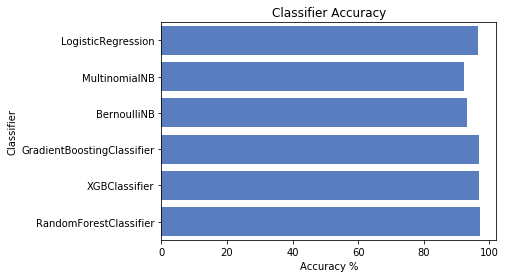

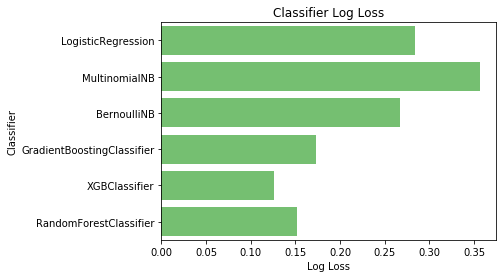

In [7]:
classifiers = [ LogisticRegression(),
                MultinomialNB(),
                BernoulliNB(),
                GradientBoostingClassifier(loss = 'deviance', n_estimators = 500,max_depth = 5,random_state=10),
                XGBClassifier(loss = 'deviance', n_estimators = 500,max_depth = 5,random_state=10,verbosity=0),
                RandomForestClassifier(n_estimators = 500),
              ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

print('=========================================')
for clf in classifiers:
    pipe = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', clf)])
    pipe.fit(x_train,y_train)
    name = clf.__class__.__name__ 
    
    
  
    
    #Accuracy
    train_predictions = pipe.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
   
    print(name,':',round(acc,2))
    #print(confusion_matrix(y_test, train_predictions))

   
   
    #Log Loss
    train_predictions = pipe.predict_proba(x_test)
    ll = log_loss(y_test, train_predictions)
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
    #print('Log-Loss:',round(ll,2),"\n")
print('=========================================')
    
    
#Visualization 
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

# Best Algorithm Chosen: Random Forest

In [8]:
#common_words=['dome', 'build', 'your', 'jewelry', 'ring', 'rose', 'jewellery', 'search', 'diamonds', 'blue', 'diamond', 'petite', 'nile', 'rings', 'gold', 'halo', 'white', 'wedding', 'pave', 'engagement', 'platinum']
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators = 500))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print('\nCONFUSION MATRIX')
print('=======================')
print('\n',confusion_matrix(y_test, prediction))
print('\nCLASSIFICATION REPORT')
print('=======================')
print(classification_report(y_test, prediction))
print('================================')
print('Total no of TestSamples taken :', confusion_matrix(y_test, prediction).sum())
print('================================')

Accuracy: 97.07%

CONFUSION MATRIX

 [[119   0   0   1   0]
 [  0 100   0   0   0]
 [  5   0 113   1   1]
 [  6   0   1 112   1]
 [  0   0   1   0 119]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

       bands       0.92      0.99      0.95       120
       brand       1.00      1.00      1.00       100
  engagement       0.98      0.94      0.96       120
     jewelry       0.98      0.93      0.96       120
       other       0.98      0.99      0.99       120

    accuracy                           0.97       580
   macro avg       0.97      0.97      0.97       580
weighted avg       0.97      0.97      0.97       580

Total no of TestSamples taken : 580


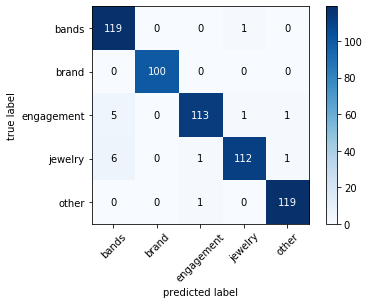

In [9]:
from mlxtend.plotting import plot_confusion_matrix
multiclass =confusion_matrix(y_test, prediction)

class_names = ['bands', 'brand','engagement','jewelry', 'other']

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=class_names)
plt.show()

# Misclassified entries & Class Probabilities

In [10]:
class_probabilities = model.predict_proba(x_test)
class_probabilities=np.round(class_probabilities,2)
prediction = model.predict(x_test)

temp_df=pd.DataFrame(columns=['input_text','actual','prediction','class_probabilities'])

for input, prediction, actual,class_prob in zip(x_test, prediction, y_test,class_probabilities):
    if prediction != actual:
        new_row=pd.Series({"input_text":input,"actual":actual,"prediction":prediction,'class_probabilities':class_prob})
        temp_df=temp_df.append(new_row,ignore_index=True)


misclassified=temp_df
misclassified=misclassified.drop(['class_probabilities'],axis=1)
class_prob=temp_df['class_probabilities'].to_list()
probability=pd.DataFrame(class_prob,columns=['bands', 'brand', 'engagement', 'jewelry', 'other'])
result=pd.concat([misclassified,probability],axis=1)
result

,input_text,actual,prediction,bands,brand,engagement,jewelry,other
0,sapphire diamond ring,jewelry,bands,0.98,0.00,0.00,0.02,0.00
1,diamond engagement ring platinum display shape rd&display carat .,engagement,bands,0.51,0.05,0.40,0.04,0.00
2,wedding rings find your matching wedding ring five stone emerald cut diamond ring platinum,engagement,bands,0.58,0.01,0.36,0.03,0.01
3,riviera pink sapphire eternity ring k white gold,jewelry,bands,0.50,0.00,0.00,0.50,0.00
4,princess cut diamond eternity bracelet platinum,jewelry,bands,0.50,0.00,0.08,0.41,0.01
5,pink sapphire diamond k white gold ring,jewelry,bands,0.59,0.00,0.01,0.40,0.00
6,sapphire diamond eternity ring k white gold,jewelry,bands,0.86,0.00,0.00,0.14,0.00
7,sale,engagement,other,0.00,0.01,0.00,0.42,0.56
8,cyber monday,jewelry,other,0.00,0.01,0.01,0.00,0.98
9,wedding rings find your matching wedding ring five stone asscher diamond ring platinum,engagement,bands,0.63,0.01,0.35,0.01,0.01
